In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This restores the same cleaned subset of CSE-CIC-IDS2018 dataset that I worked on earlier.

# Load the preprocessed dataset
df = pd.read_csv("../../preprocessed_data/preprocessed_ids2018_subset_after_research.csv")

# Quick look
print("Shape:", df.shape)
df.head()


Shape: (2098077, 35)


,Dst Port,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Max,Bwd Pkt Len Std,Flow Byts/s,...,Pkt Size Avg,Fwd Seg Size Avg,Subflow Fwd Byts,Subflow Bwd Pkts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Mean,Idle Max,Label
0,0.978123,0.128683,0.474801,0.490212,0.109052,0.478933,0.058420,0.077661,0.474985,0.000059,...,0.801460,0.058420,0.490212,0.505639,0.957596,0.222457,0.125,0.000013,0.000017,1
1,0.978123,0.850330,0.251989,0.000000,0.000053,0.000000,0.000049,0.000000,0.000027,0.000000,...,0.000023,0.000049,0.000000,0.000000,0.236993,0.000000,0.125,0.000013,0.000017,1
2,0.978123,0.005754,0.474801,0.490212,0.109052,0.478933,0.058420,0.077661,0.474985,0.000092,...,0.801460,0.058420,0.490212,0.505639,0.957596,0.222457,0.125,0.000013,0.000017,1
3,0.978123,0.673610,0.251989,0.000000,0.000053,0.000000,0.000049,0.000000,0.000027,0.000000,...,0.000023,0.000049,0.000000,0.000000,0.236993,0.000000,0.125,0.000013,0.000017,1
4,0.978123,0.005611,0.474801,0.490212,0.109052,0.478933,0.058420,0.077661,0.474985,0.000092,...,0.801460,0.058420,0.490212,0.505639,0.957596,0.222457,0.125,0.000013,0.000017,1


In [2]:
# Quick check that the target (label) column still exists and is named correctly (should be 'Label' as I defined it earlier)
print(df.columns)

# Print how many benign and malicious rows exist ----> (0 for benign & 1 for malicious)
print(df['Label'].value_counts())

Index(['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean',
       'RST Flag Cnt', 'ACK Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Idle Mean', 'Idle Max',
       'Label'],
      dtype='object')
Label
0    1209156
1     888921
Name: count, dtype: int64


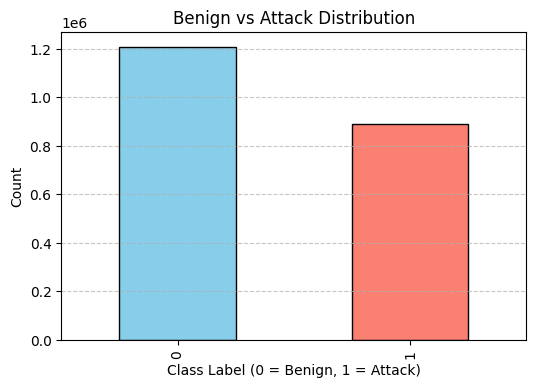

Class distribution (%):
Label
0    57.631631
1    42.368369
Name: proportion, dtype: float64


In [3]:
# Plot the class imbalance

plt.figure(figsize=(6,4))
df['Label'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    edgecolor='black'
)
plt.title("Benign vs Attack Distribution")
plt.xlabel("Class Label (0 = Benign, 1 = Attack)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Also we can print the percentage distribution for the benign and the malicious rows.
ratio = df['Label'].value_counts(normalize=True) * 100
print("Class distribution (%):")
print(ratio)

